TITANIC

https://www.kaggle.com/competitions/titanic/overview

```
survival	Survival		0 = No, 1 = Yes
pclass		Ticket class		1 = 1st, 2 = 2nd, 3 = 3rd
sex		Sex	
Age		Age in years	
sibsp		# of siblings / spouses aboard the Titanic	
parch		# of parents / children aboard the Titanic	
ticket		Ticket number	
fare		Passenger fare	
cabin		Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```

데이터 분석을 잘하는사람

데이터 도메인

인사이트능력

In [1]:
import numpy as np
import pandas as pd

# 데이터 가져오기

In [2]:
train = pd.read_csv('./train.csv')
#train.head(10)
train.info()
# train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.columns = train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

# 결측치 확인

In [4]:
train.isna().sum()[train.isna().sum()>0].sort_values(ascending=False)

cabin       687
age         177
embarked      2
dtype: int64

# 중복값 확인

In [5]:
# distinct
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
train['sex'].nunique()

2

In [7]:
train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
len(train['age'].unique())
train['age'].nunique() # 널값은 빼는듯?

88

In [9]:
train.nunique()

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             88
sibsp            7
parch            7
ticket         681
fare           248
cabin          147
embarked         3
dtype: int64

# 한번에 출력
```
col        cnt         nan_cnt         nan_rate

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
컬럼명
```

In [10]:
col = train.columns
col

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [11]:
nan_cnt = train.isna().sum().values
nan_cnt

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2],
      dtype=int64)

In [12]:
cnt = train.count().values
cnt

array([891, 891, 891, 891, 891, 714, 891, 891, 891, 891, 204, 889],
      dtype=int64)

In [13]:
nan_rate = nan_cnt/train.shape[0]*100
nan_rate

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       19.86531987,  0.        ,  0.        ,  0.        ,  0.        ,
       77.1043771 ,  0.22446689])

In [14]:
unique_cnt = train.nunique().values
unique_cnt

array([891,   2,   3, 891,   2,  88,   7,   7, 681, 248, 147,   3],
      dtype=int64)

In [15]:
res = pd.DataFrame({'cnt':cnt, 'unique_cnt':unique_cnt, 'nan_cnt':nan_cnt}, index=col)
# res['cnt'] = cnt
# res['unique_cnt'] = unique_cnt
# res['nan_cnt'] = nan_cnt
res['nan_rate'] = list(map(lambda x:str(x)+'%', nan_rate.round(2)))
res.sort_values('nan_rate', ascending=False).T

,cabin,age,embarked,passengerid,survived,pclass,name,sex,sibsp,parch,ticket,fare
cnt,204,714,889,891,891,891,891,891,891,891,891,891
unique_cnt,147,88,3,891,2,3,891,2,7,7,681,248
nan_cnt,687,177,2,0,0,0,0,0,0,0,0,0
nan_rate,77.1%,19.87%,0.22%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


# EDA

탐색적 데이터 분석

시각화

In [16]:
#! pip install matplotlib

In [17]:
import matplotlib.pyplot as plt

## passengerid

### 삭제 분석에 필요없는 컬럼

In [18]:
train = train.drop(['passengerid'], axis=1)
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## survived: target

타겟의 분포도가 골고루 있어야 좋은 학습 가능

In [19]:
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

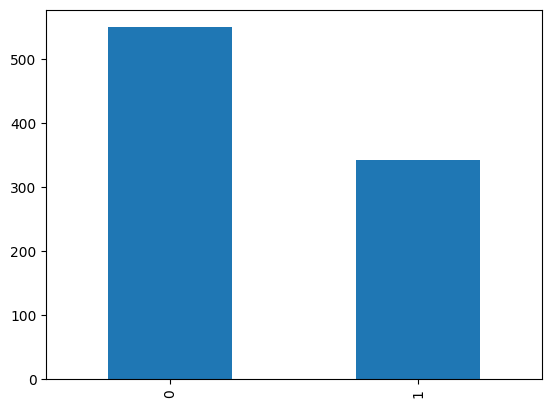

In [20]:
train['survived'].value_counts().plot(kind='bar')
plt.show()

## pclass

In [21]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

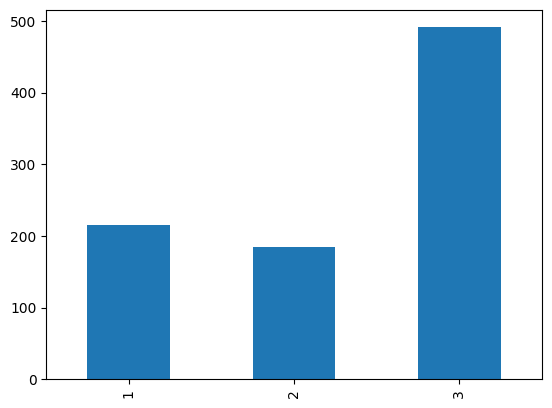

In [22]:
train['pclass'].value_counts().sort_index().plot(kind='bar')
plt.show()

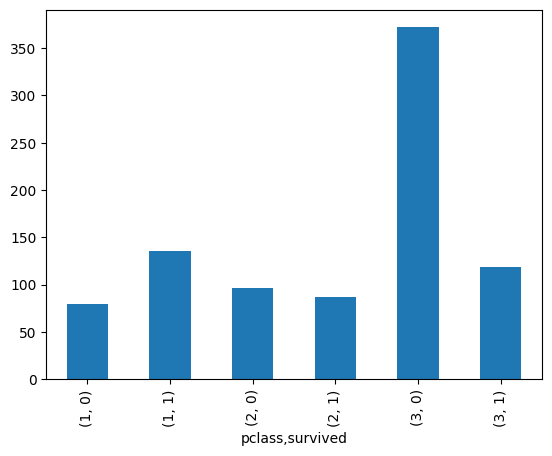

In [23]:
train[['pclass','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

## cabin

In [24]:
train[train['cabin'].notna()==True].shape

(204, 11)

### 앞글자만 따기

In [25]:
traincp = train[train['cabin'].notna()==True]
traincp['cabin_str'] = traincp['cabin'].str[0]
traincp.head()

C:\Users\ASIA\AppData\Local\Temp\ipykernel_11492\11000455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traincp['cabin_str'] = traincp['cabin'].str[0]


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_str
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C


In [26]:
traincp[['cabin_str','survived']].value_counts().sort_index()

cabin_str  survived
A          0            8
           1            7
B          0           12
           1           35
C          0           24
           1           35
D          0            8
           1           25
E          0            8
           1           24
F          0            5
           1            8
G          0            2
           1            2
T          0            1
dtype: int64

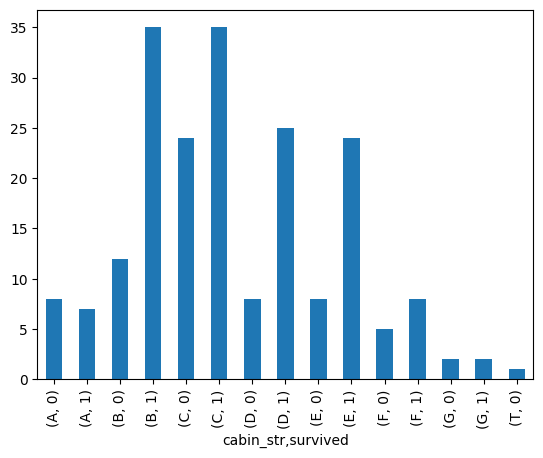

In [27]:
traincp[['cabin_str','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

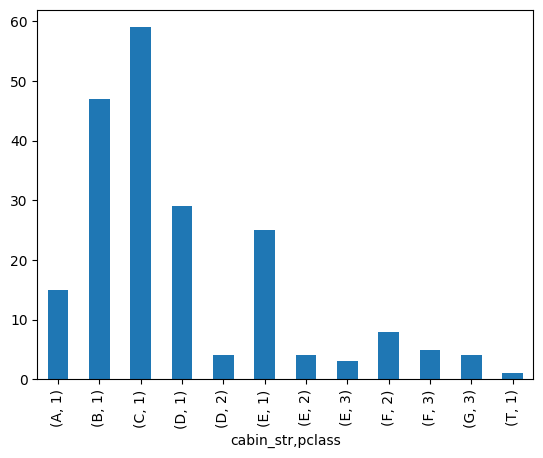

In [28]:
traincp[['cabin_str','pclass']].value_counts().sort_index().plot(kind='bar')
plt.show()

### 컬럼 삭제

cabin의 의미는 분석가마다 다 다름

우리는 생존과 연관이 없다고 판단 삭제 고고

In [29]:
del traincp
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## embarked

### 결측치 채우기
```
df.mode().values[0]
```
데이터를 삭제하는건 안됨

심사숙고하여 잘라야함

In [30]:
train['embarked'].isna().sum()

2

In [31]:
train[train['embarked'].isna()==True]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [32]:
# 오브젝트타입의 describe()는 다른 결과를 보여줌
train['embarked'].describe()['top']

'S'

In [33]:
embarked_mode_val = train['embarked'].mode().values[0]
embarked_mode_val

'S'

In [34]:
train['embarked'] = train['embarked'].fillna(embarked_mode_val)
train['embarked'].isna().sum()

0

In [35]:
train['embarked'].value_counts().sort_index()

C    168
Q     77
S    646
Name: embarked, dtype: int64

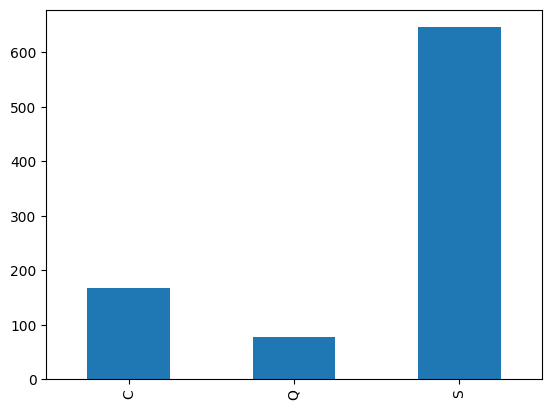

In [36]:
train['embarked'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [37]:
train[['embarked','survived']].value_counts().sort_index()

embarked  survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

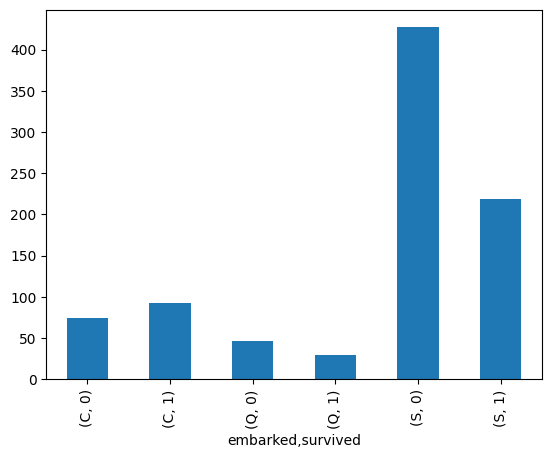

In [38]:
train[['embarked','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

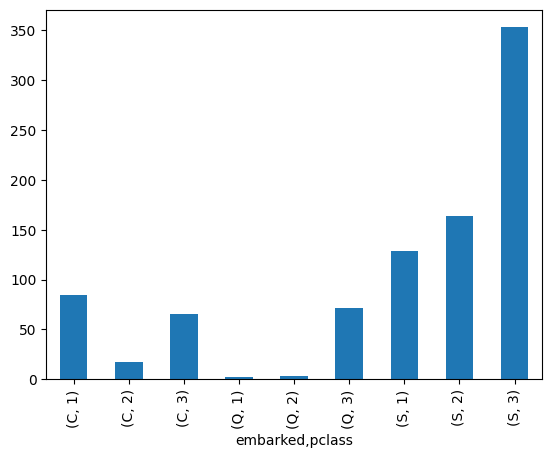

In [39]:
train[['embarked','pclass']].value_counts().sort_index().plot(kind='bar')
plt.show()

## name

### 호칭 분리
정규표현식으로 떼오기
```
df['컬럼명'].str.extract('정규표현식')
```

In [40]:
exam = train.loc[30,'name']
exam

'Uruchurtu, Don. Manuel E'

In [41]:
import re
re.findall('\s([\w]+)[.]\s', exam)

['Don']

In [42]:
train['name_title'] = train['name'].str.extract('\s([\w]+)[.]\s')
train['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [43]:
train['name_title'].value_counts().sort_index()

Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: name_title, dtype: int64

In [44]:
train[['name_title','sex']].value_counts().sort_index()

name_title  sex   
Capt        male        1
Col         male        2
Countess    female      1
Don         male        1
Dr          female      1
            male        6
Jonkheer    male        1
Lady        female      1
Major       male        2
Master      male       40
Miss        female    182
Mlle        female      2
Mme         female      1
Mr          male      517
Mrs         female    125
Ms          female      1
Rev         male        6
Sir         male        1
dtype: int64

In [45]:
train[(train['name_title']=='Dr')&(train['sex']=='female')]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title
796,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr


#### 값 변경 연습

자주쓰지않는 호칭 변경
```
df.replace('A','B')
df.map({'A':'B'})
df.applay(lambda)
df.loc[변경하고싶은데이터프레임] = 배열or인덱스or시리즈: dp.where 어쩌구
```

In [46]:
# replace()
traincp = train.copy()
traincp['sex'] = traincp['sex'].replace(['male','female'], [1,0])
traincp.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [47]:
# map
traincp['pclass'] = traincp['pclass'].map({1:11,2:22,3:33})
traincp.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title
0,0,33,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,33,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,11,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,33,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [48]:
# 람다
traincp['sex'] = traincp['sex'].apply(lambda x: 'M' if x==1 else 'G')
traincp.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title
0,0,33,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",G,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,33,"Heikkinen, Miss. Laina",G,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,11,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",G,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,33,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Mr


### 호칭 변경

자 그러면 바꿔보자

<pre>
Rev.   목사 --> Mr.
Don. 상대 남성의 존칭 --> Mr.
Jonkheer.  無작위귀족(Jonkheer)  --> Mr.
Major. 미군계급  --> Mr.
Col.   미군장교  --> Mr.
Capt.  선생님,공군 --> Mr.
Sir.      귀족남석 --> Mr.

Countess. 백작부인  --> Mrs.
Mme.  Madame  --> Mrs.

Mlle.  나이어린여아  --> Miss.
Ms.   결혼여부     --> Miss.
Lady. 나이어린여성 --> Miss.

In [49]:
to_Mr = ['Rev', 'Don', 'Jonkheer', 'Major', 'Col', 'Capt', 'Sir']
to_Mrs = ['Countess', 'Mme']
to_Miss = ['Mlle', 'Ms', 'Lady']
traincp['name_title'] = traincp['name_title'].replace(to_Mr, ['Mr']*len(to_Mr))
traincp['name_title'] = traincp['name_title'].replace(to_Mrs, ['Mrs']*len(to_Mrs))
traincp['name_title'] = traincp['name_title'].replace(to_Miss, ['Miss']*len(to_Miss))
traincp['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [50]:
train['name_title'] = traincp['name_title']
del traincp
train['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [51]:
train['name_title'].value_counts()

Mr        531
Miss      186
Mrs       127
Master     40
Dr          7
Name: name_title, dtype: int64

바꿔서 새로운 컬럼에 넣을 경우에는 마지막 replace만 적용됨

따라서 이처럼 세번 바꾸는거보다는 한번에 replace하는걸 권장

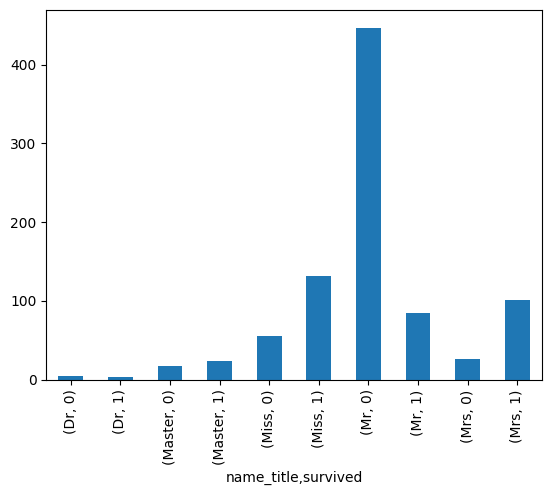

In [52]:
train[['name_title','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

## sex

In [53]:
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [54]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [55]:
train[['sex','survived']].value_counts().sort_index()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

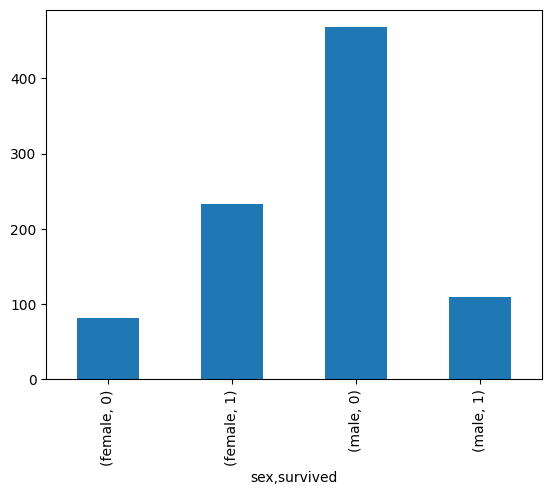

In [56]:
train[['sex','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

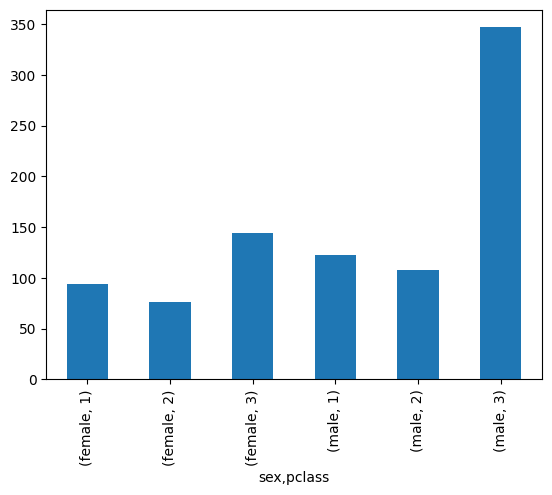

In [57]:
train[['sex','pclass']].value_counts().sort_index().plot(kind='bar')
plt.show()

## age

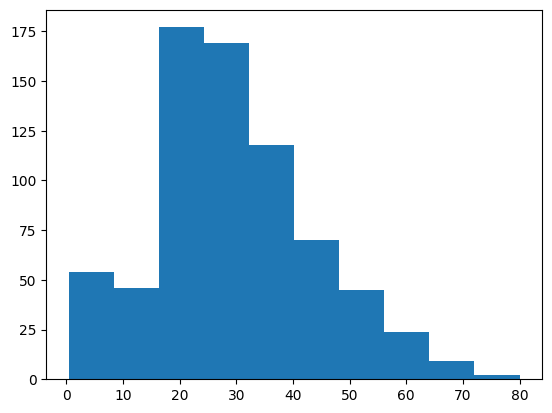

In [58]:
plt.hist(train['age'])
plt.show()

### 결측치 확인

In [59]:
train['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [60]:
train['age'].isna().sum()

177

In [61]:
train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

### 결측치 채우기

호칭의 평균나이로 채우기

In [62]:
# 호칭별 평균나이
train.groupby('name_title')['age'].mean()

name_title
Dr        42.000000
Master     4.574167
Miss      22.020000
Mr        32.891990
Mrs       35.763636
Name: age, dtype: float64

In [63]:
train.groupby('name_title')['age'].mean()['Dr']

42.0

In [64]:
train['age'][train['name_title']=='Dr'].mean()

42.0

In [65]:
(train['age'].isna()==True)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [66]:
(train['name_title']=='Dr')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: name_title, Length: 891, dtype: bool

In [67]:
np.where((train['age'].isna()==True)&(train['name_title']=='Dr'),1,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

다섯번 해야함 노가다 ㄴㄴㄴㄴ

#### 피봇 연습
```
df.pivot_table(
        self,
        values=None,
        index=None,
        columns=None,
        aggfunc="mean",
        
        fill_value=None,
        margins=False,
        dropna=True,
        margins_name="All",
        observed=False,
        sort=True,
    )
```

In [68]:
import warnings
warnings.filterwarnings(action='ignore')

In [69]:
emp = pd.read_csv('../file/emp.csv')
emp.columns = emp.columns.str.lower()
emp.head(1)

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17 00:00:00,800,NaN,20


In [70]:
emp.pivot_table(index='deptno', values='sal', aggfunc='mean')

,sal
deptno,
10,2916.666667
20,2175.000000
30,1566.666667


#### 일괄적용 연습
https://steadiness-193.tistory.com/42
```
.apply()      # 멀티 인덱스(그룹별 데이터프레임 출력)
.transform()  # 기존 인덱스 유지
```

In [71]:
# 부서별 급여평균
emp.groupby('deptno')['sal'].mean()

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

In [72]:
emp.groupby('deptno')['sal'].apply('mean')
# apply는 그룹핑 됨

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

In [73]:
emp.groupby('deptno')['sal'].transform('mean')
# trainsfrom은 원본 인덱스 그대로 들어감

0     2175.000000
1     1566.666667
2     1566.666667
3     2175.000000
4     1566.666667
5     1566.666667
6     2916.666667
7     2175.000000
8     2916.666667
9     1566.666667
10    2175.000000
11    1566.666667
12    2175.000000
13    2916.666667
Name: sal, dtype: float64

### 결측치 그룹별평균값으로 일괄적용

In [74]:
train.groupby('name_title')['age'].mean()

name_title
Dr        42.000000
Master     4.574167
Miss      22.020000
Mr        32.891990
Mrs       35.763636
Name: age, dtype: float64

In [75]:
traincp = train.copy()
mean_age_by_title = traincp.groupby('name_title')['age'].transform('mean')
mean_age_by_title

0      32.891990
1      35.763636
2      22.020000
3      35.763636
4      32.891990
         ...    
886    32.891990
887    22.020000
888    22.020000
889    32.891990
890    32.891990
Name: age, Length: 891, dtype: float64

In [76]:
# 호칭별 평균나이 시리즈로 뽑아서 결측값에 넣는방법
traincp['age2'] = traincp['age'].fillna(   mean_age_by_title   )
traincp['age2']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    22.02
889    26.00
890    32.00
Name: age2, Length: 891, dtype: float64

In [77]:
traincp.groupby('name_title')['age'].mean()

name_title
Dr        42.000000
Master     4.574167
Miss      22.020000
Mr        32.891990
Mrs       35.763636
Name: age, dtype: float64

In [78]:
# lambda 방식
traincp['age3'] = traincp.groupby('name_title')['age'].transform(lambda gdf:gdf.fillna(   gdf.mean()   ))
traincp['age3']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    22.02
889    26.00
890    32.00
Name: age3, Length: 891, dtype: float64

In [79]:
train['age'] = traincp['age3']
del traincp
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   name        891 non-null    object 
 3   sex         891 non-null    object 
 4   age         891 non-null    float64
 5   sibsp       891 non-null    int64  
 6   parch       891 non-null    int64  
 7   ticket      891 non-null    object 
 8   fare        891 non-null    float64
 9   cabin       204 non-null    object 
 10  embarked    891 non-null    object 
 11  name_title  891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


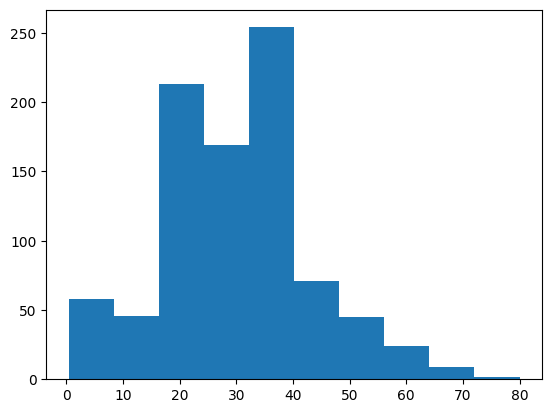

In [80]:
plt.hist(train['age'])
plt.show()

### 나이를 대충 구간화(EDA용)
```
/   # 나누기
//  # 몫
%   # 나머지
```

In [81]:
train['age_g'] = (train['age']//10).astype('int')
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,age_g
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3


In [82]:
train[['age_g','survived']].value_counts().sort_index()

age_g  survived
0      0            26
       1            40
1      0            61
       1            41
2      0           157
       1            99
3      0           202
       1           101
4      0            56
       1            34
5      0            28
       1            20
6      0            13
       1             6
7      0             6
8      1             1
dtype: int64

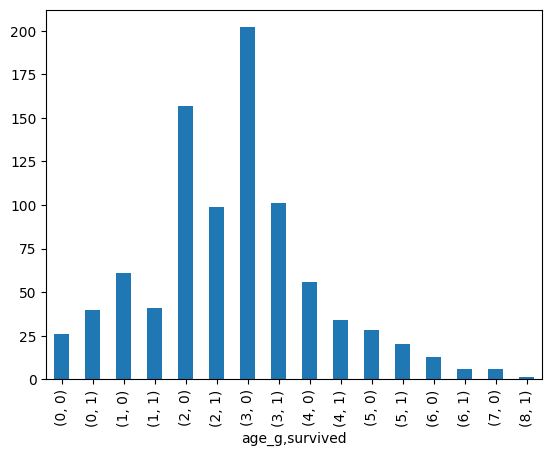

In [83]:
train[['age_g','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

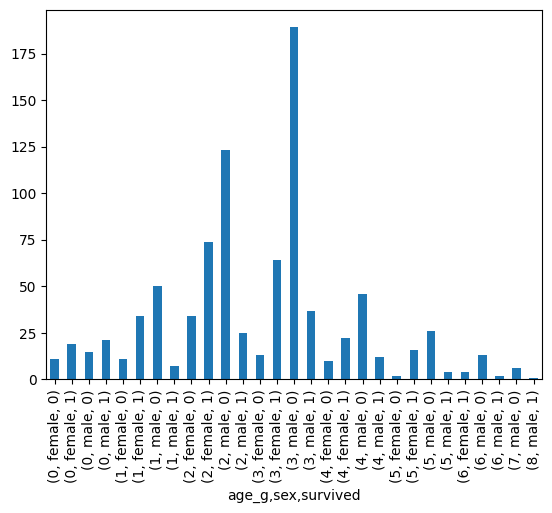

In [84]:
train[['age_g','sex','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

In [85]:
train.groupby('survived')[['age_g','sex']].value_counts()

survived  age_g  sex   
0         3      male      189
          2      male      123
          1      male       50
          4      male       46
          2      female     34
          5      male       26
          0      male       15
          3      female     13
          6      male       13
          0      female     11
          1      female     11
          4      female     10
          7      male        6
          5      female      2
1         2      female     74
          3      female     64
                 male       37
          1      female     34
          2      male       25
          4      female     22
          0      male       21
                 female     19
          5      female     16
          4      male       12
          1      male        7
          5      male        4
          6      female      4
                 male        2
          8      male        1
dtype: int64

#### 교차검증 연습
```
def crosstab(
    index,            # y축
    columns,          # x축
    values=None,      # 
    
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: bool = False,
    margins_name: str = "All",
    dropna: bool = True,
    normalize=False,
) -> DataFrame:
```

In [86]:
pd.crosstab(index=[train['pclass'], train['sex']], columns=[train['age_g'], train['survived']])

age_g           0       1       2        3       4       5      6     7  8
survived        0   1   0   1   0   1    0   1   0   1   0   1  0  1  0  1
pclass sex                                                                
1      female   1   0   0  13   1  16    0  35   0  13   1  11  0  3  0  0
       male     0   2   3   2   9   9   26  17  16   9  11   4  9  1  3  1
2      female   0   8   0   8   3  24    1  16   1   9   1   5  0  0  0  0
       male     0   9   9   1  28   0   35   5   7   1   9   0  2  1  1  0
3      female  10  11  11  13  30  34   12  13   9   0   0   0  0  1  0  0
       male    15  10  38   4  86  16  128  15  23   2   6   0  2  0  2  0

## sibsp, parch

In [87]:
train['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [88]:
train['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [89]:
train['family'] = train['sibsp'] + train['parch'] + 1
train.sort_values('family', ascending=False)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,age_g,family
180,0,3,"Sage, Miss. Constance Gladys",female,22.020000,8,2,CA. 2343,69.5500,NaN,S,Miss,2,11
846,0,3,"Sage, Mr. Douglas Bullen",male,32.891990,8,2,CA. 2343,69.5500,NaN,S,Mr,3,11
792,0,3,"Sage, Miss. Stella Anna",female,22.020000,8,2,CA. 2343,69.5500,NaN,S,Miss,2,11
201,0,3,"Sage, Mr. Frederick",male,32.891990,8,2,CA. 2343,69.5500,NaN,S,Mr,3,11
159,0,3,"Sage, Master. Thomas Henry",male,4.574167,8,2,CA. 2343,69.5500,NaN,S,Master,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0,3,"Svensson, Mr. Olof",male,24.000000,0,0,350035,7.7958,NaN,S,Mr,2,1
194,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.000000,0,0,PC 17610,27.7208,B4,C,Mrs,4,1
497,0,3,"Shellard, Mr. Frederick William",male,32.891990,0,0,C.A. 6212,15.1000,NaN,S,Mr,3,1
195,1,1,"Lurette, Miss. Elise",female,58.000000,0,0,PC 17569,146.5208,B80,C,Miss,5,1


In [90]:
# 가장많은 패밀리의 티켓번호
train[train['ticket']=='CA. 2343']

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,age_g,family
159,0,3,"Sage, Master. Thomas Henry",male,4.574167,8,2,CA. 2343,69.55,NaN,S,Master,0,11
180,0,3,"Sage, Miss. Constance Gladys",female,22.020000,8,2,CA. 2343,69.55,NaN,S,Miss,2,11
201,0,3,"Sage, Mr. Frederick",male,32.891990,8,2,CA. 2343,69.55,NaN,S,Mr,3,11
324,0,3,"Sage, Mr. George John Jr",male,32.891990,8,2,CA. 2343,69.55,NaN,S,Mr,3,11
792,0,3,"Sage, Miss. Stella Anna",female,22.020000,8,2,CA. 2343,69.55,NaN,S,Miss,2,11
846,0,3,"Sage, Mr. Douglas Bullen",male,32.891990,8,2,CA. 2343,69.55,NaN,S,Mr,3,11
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.020000,8,2,CA. 2343,69.55,NaN,S,Miss,2,11


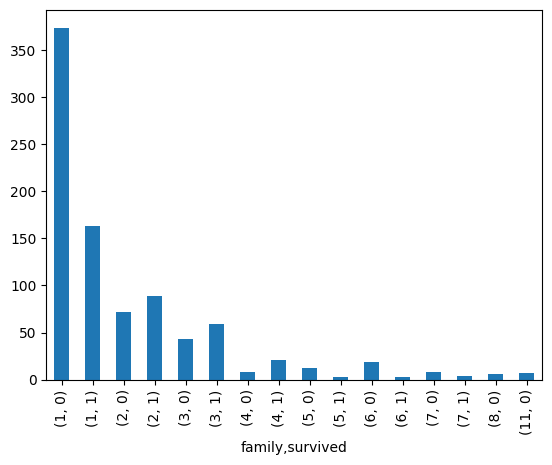

In [91]:
train[['family','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

In [92]:
pd.crosstab(index=[train['family'], train['sex']], columns=[train['pclass'], train['survived']])

pclass          1       2        3    
survived        0   1   0   1    0   1
family sex                            
1      female   1  33   3  29   23  37
       male    50  25  65   7  232  32
2      female   0  39   2  17   14  15
       male    19  12  14   1   23   5
3      female   0  13   1  13   10  12
       male     6   5   9   8   17   8
4      female   2   2   0   9    1   5
       male     0   3   3   1    2   1
5      female   0   2   0   1    9   0
       male     0   0   0   0    3   0
6      female   0   2   0   1    5   0
       male     2   0   0   0   12   0
7      female   0   0   0   0    5   3
       male     0   0   0   0    3   1
8      female   0   0   0   0    2   0
       male     0   0   0   0    4   0
11     female   0   0   0   0    3   0
       male     0   0   0   0    4   0

## fare

In [93]:
train['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [94]:
train[train['fare']==0.0]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,age_g,family
179,0,3,"Leonard, Mr. Lionel",male,36.00000,0,0,LINE,0.0,NaN,S,Mr,3,1
263,0,1,"Harrison, Mr. William",male,40.00000,0,0,112059,0.0,B94,S,Mr,4,1
271,1,3,"Tornquist, Mr. William Henry",male,25.00000,0,0,LINE,0.0,NaN,S,Mr,2,1
277,0,2,"Parkes, Mr. Francis ""Frank""",male,32.89199,0,0,239853,0.0,NaN,S,Mr,3,1
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00000,0,0,LINE,0.0,NaN,S,Mr,1,1
413,0,2,"Cunningham, Mr. Alfred Fleming",male,32.89199,0,0,239853,0.0,NaN,S,Mr,3,1
466,0,2,"Campbell, Mr. William",male,32.89199,0,0,239853,0.0,NaN,S,Mr,3,1
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,32.89199,0,0,239854,0.0,NaN,S,Mr,3,1
597,0,3,"Johnson, Mr. Alfred",male,49.00000,0,0,LINE,0.0,NaN,S,Mr,4,1
633,0,1,"Parr, Mr. William Henry Marsh",male,32.89199,0,0,112052,0.0,NaN,S,Mr,3,1


In [95]:
train[train['fare']==train['fare'].max()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,age_g,family
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,3,1
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,3,2
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,3,1


In [96]:
train['fare_a'] = train['fare'] / train['family']
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,age_g,family,fare_a
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,2,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,1,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2,26.55000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,1,8.05000


In [97]:
train['fare_a'].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: fare_a, dtype: float64

## 최종

### 컬럼 삭제

결측치 X, 오브젝트 X

In [98]:
train.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'name_title', 'age_g', 'family', 'fare_a'],
      dtype='object')

컬럼들
<pre>
['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'name_title', 'age_g', 'family', 'fare_a']
</pre>

삭제
<pre>
['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'fare_a']
</pre>

타겟
<pre>
['survived']
</pre>

피쳐
<pre>
['pclass', 'sex', 'name_title', 'age_g', 'family', 'age']
</pre>

In [99]:
traincp = train.copy()
train = traincp[['survived', 'pclass', 'sex', 'name_title', 'age_g', 'family', 'age']]
train.head()

,survived,pclass,sex,name_title,age_g,family,age
0,0,3,male,Mr,2,2,22.0
1,1,1,female,Mrs,3,2,38.0
2,1,3,female,Miss,2,1,26.0
3,1,1,female,Mrs,3,2,35.0
4,0,3,male,Mr,3,1,35.0


### 결측치 확인

In [100]:
# 결측치
train.isna().sum()

survived      0
pclass        0
sex           0
name_title    0
age_g         0
family        0
age           0
dtype: int64

In [101]:
# 오브젝트타입확인
train.select_dtypes('object').columns

Index(['sex', 'name_title'], dtype='object')

### 오브젝트타입 확인

In [102]:
# 오브젝트타입확인
train.dtypes[train.dtypes.values=='object'].index

Index(['sex', 'name_title'], dtype='object')

In [103]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

#### 범주화 연습(Category)
```
LabelEncoder()
OneHotEncoder()
pd.get_dummies()
```
자동 결측처리 + LabelEncoder() + OneHotEncoder()

In [104]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [105]:
# LabelEncoder: 값을 사전순으로 정렬 후 0부터 숫자로 쭉쭉
#train['sex_le'] = train['sex'].replace(['male','female'], [1,0])
le = LabelEncoder()
le.fit(train['sex'])
res = le.transform(train['sex'])
pd.concat([train, pd.DataFrame(res, columns=['gender_le'])], axis=1)

,survived,pclass,sex,name_title,age_g,family,age,gender_le
0,0,3,male,Mr,2,2,22.00,1
1,1,1,female,Mrs,3,2,38.00,0
2,1,3,female,Miss,2,1,26.00,0
3,1,1,female,Mrs,3,2,35.00,0
4,0,3,male,Mr,3,1,35.00,1
...,...,...,...,...,...,...,...,...
886,0,2,male,Mr,2,1,27.00,1
887,1,1,female,Miss,1,1,19.00,0
888,0,3,female,Miss,2,4,22.02,0
889,1,1,male,Mr,2,1,26.00,1


In [106]:
train['name_title'].values.reshape(-1,1).shape

(891, 1)

In [107]:
train[['name_title']].shape

(891, 1)

In [108]:
# OneHotEncoder: 값을 컬럼이름으로 만들어서 0또는1값으로 쭉쭉
oe = OneHotEncoder(sparse=False, dtype='int')
oe.fit(train[['name_title']])
res = oe.transform(train[['name_title']])
pd.concat([train, pd.DataFrame(res, columns=oe.categories_[0])], axis=1)

,survived,pclass,sex,name_title,age_g,family,age,Dr,Master,Miss,Mr,Mrs
0,0,3,male,Mr,2,2,22.00,0,0,0,1,0
1,1,1,female,Mrs,3,2,38.00,0,0,0,0,1
2,1,3,female,Miss,2,1,26.00,0,0,1,0,0
3,1,1,female,Mrs,3,2,35.00,0,0,0,0,1
4,0,3,male,Mr,3,1,35.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,Mr,2,1,27.00,0,0,0,1,0
887,1,1,female,Miss,1,1,19.00,0,0,1,0,0
888,0,3,female,Miss,2,4,22.02,0,0,1,0,0
889,1,1,male,Mr,2,1,26.00,0,0,0,1,0


In [109]:
# pd.get_dummies()
traincp = pd.concat([train, pd.concat([pd.get_dummies(train['sex']), pd.get_dummies(train['name_title'])], axis=1)], axis=1)
train = traincp.drop(['sex','name_title'], axis=1)

#### 구간화 연습(Bining)
```
pd.cut()
pd.qcut()
```

In [110]:
train['age'].describe()

count    891.000000
mean      29.832004
std       13.285056
min        0.420000
25%       22.000000
50%       30.000000
75%       35.763636
max       80.000000
Name: age, dtype: float64

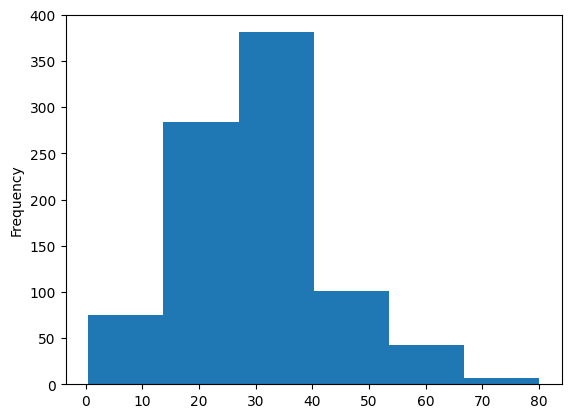

In [111]:
bins=6
train['age'].plot(kind='hist', bins=bins)
plt.show()

In [112]:
age_arr = train['age'].values
pd.cut(age_arr, bins).describe()

,counts,freqs
categories,,
"(0.34, 13.683]",75,0.084175
"(13.683, 26.947]",284,0.318743
"(26.947, 40.21]",381,0.427609
"(40.21, 53.473]",101,0.113356
"(53.473, 66.737]",43,0.048260
"(66.737, 80.0]",7,0.007856


In [130]:
pd.cut(train['age'], bins, labels=[n for n in range(bins)]).value_counts()

2    381
1    284
3    101
0     75
4     43
5      7
Name: age, dtype: int64

In [119]:
pd.qcut(age_arr, bins).describe()

,counts,freqs
categories,,
"(0.419, 19.0]",168,0.188552
"(19.0, 24.0]",149,0.167228
"(24.0, 30.0]",132,0.148148
"(30.0, 32.892]",158,0.177329
"(32.892, 40.833]",135,0.151515
"(40.833, 80.0]",149,0.167228


# 모델 학습 ㄱㄱ

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age_g     891 non-null    int32  
 3   family    891 non-null    int64  
 4   age       891 non-null    float64
 5   female    891 non-null    uint8  
 6   male      891 non-null    uint8  
 7   Dr        891 non-null    uint8  
 8   Master    891 non-null    uint8  
 9   Miss      891 non-null    uint8  
 10  Mr        891 non-null    uint8  
 11  Mrs       891 non-null    uint8  
dtypes: float64(1), int32(1), int64(3), uint8(7)
memory usage: 37.5 KB


In [147]:
train.head()

,survived,pclass,age_g,family,age,female,male,Dr,Master,Miss,Mr,Mrs
0,0,3,2,2,22.0,0,1,0,0,0,1,0
1,1,1,3,2,38.0,1,0,0,0,0,0,1
2,1,3,2,1,26.0,1,0,0,0,1,0,0
3,1,1,3,2,35.0,1,0,0,0,0,0,1
4,0,3,3,1,35.0,0,1,0,0,0,1,0


In [149]:
y = train['survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [151]:
X = train.drop('survived', axis=1)
X

,pclass,age_g,family,age,female,male,Dr,Master,Miss,Mr,Mrs
0,3,2,2,22.00,0,1,0,0,0,1,0
1,1,3,2,38.00,1,0,0,0,0,0,1
2,3,2,1,26.00,1,0,0,0,1,0,0
3,1,3,2,35.00,1,0,0,0,0,0,1
4,3,3,1,35.00,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,2,1,27.00,0,1,0,0,0,1,0
887,1,1,1,19.00,1,0,0,0,1,0,0
888,3,2,4,22.02,1,0,0,0,1,0,0
889,1,2,1,26.00,0,1,0,0,0,1,0


## 분류모델 DecisionTree
```
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```
```
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
```
```
sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None
```

In [323]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(891, 11)
(891,)
(712, 11)
(179, 11)
(712,)
(179,)


In [304]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [305]:
y_test.values

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [319]:
cnt=0
for i in range(len(y_pred)):
    if y_pred[i]==y_test.values[i]:
        cnt+=1
cnt/len(y_pred)

0.7932960893854749

In [317]:
acc_scr = accuracy_score(y_test, y_pred)
acc_scr

0.7932960893854749